<a href="https://colab.research.google.com/github/aliceshi2023/DS_002/blob/main/CodeSanityChecker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS002.9.1 Code sanity checker

Use this notebook to verify that you can import your code from the repository. 



---


# Imports

Import your "by scratch" code first. Your repo should contain the following files:

```bash
byscratch
├── gradient_descent.py
├── k_nearest_neighbors.py
├── linear_algebra.py
├── probability.py
└── statistics.py
```

## Changes to the code from our textbook
These changes should make things easier

1. put imports at the top
1. used relative imports to avoid namespace problems
1. remove the `main()` loop

# Please update your repository to contain these files. Find them in this new repository:

https://github.com/douglasgoodwin/byscratch.git

# Clone your code into a directory called "byscratch"

# Be sure to use use YOUR REPO, and not mine ;)

In [ ]:
# Clone your code into a directory called "byscratch"
# 
! rm -Rf byscratch ;
!git clone https://github.com/angelessoriano1/byscratch.git byscratch

Cloning into 'byscratch'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 42 (delta 14), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (42/42), done.


# Import Your code

In [ ]:
# Import Your code
from byscratch.linear_algebra import Vector, Matrix
from byscratch.linear_algebra import make_matrix
from byscratch.linear_algebra import sum_of_squares
from byscratch.linear_algebra import dot
from byscratch.linear_algebra import subtract
from byscratch.linear_algebra import magnitude
from byscratch.linear_algebra import scalar_multiply
from byscratch.linear_algebra import vector_mean
from byscratch.linear_algebra import distance
from byscratch.linear_algebra import add

from byscratch.statistics import correlation
from byscratch.statistics import standard_deviation
from byscratch.statistics import median
from byscratch.statistics import mean
from byscratch.statistics import de_mean
from byscratch.statistics import standard_deviation

from byscratch.gradient_descent import gradient_step

from byscratch.probability import inverse_normal_cdf

In [ ]:
# python library imports
import random, datetime, re, csv, math, enum
from collections import defaultdict, Counter
from typing import Tuple, List, NamedTuple, Optional, Callable
from typing import TypeVar, List, Iterator

# external code
from dateutil.parser import parse
import tqdm

# pyplot configs
import seaborn as sns
from matplotlib import pyplot as plt

# font
plt.rcParams.update({'font.size': 8})

# reset the default figsize value
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

# 144 is good for a high-resolution display. Try 100 if it's too big
plt.rcParams["figure.dpi"] = (80)

# Try the data


In [ ]:
# show the first two rows: header and data
!head -1 /content/byscratch/data/adult_9ksample.csv > cols.txt ;
# !cat cols.txt

with open("cols.txt") as f:
    for line in f:
        cols = line.strip().split(',')

print("| i | col |")
print("|-- |---- |")
for i,c in enumerate(cols):
  print(f"| {i} | {c} |")

| i | col |
|-- |---- |
| 0 |  |
| 1 | age |
| 2 | workclass |
| 3 | fnlwgt |
| 4 | education |
| 5 | educational-num |
| 6 | marital-status |
| 7 | occupation |
| 8 | relationship |
| 9 | race |
| 10 | gender |
| 11 | capital-gain |
| 12 | capital-loss |
| 13 | hours-per-week |
| 14 | native-country |
| 15 | income |


In [ ]:
# Get the shape of this dataset
filename = "/content/byscratch/data/adult_9ksample.csv"
with open(filename) as f:
    numlines = sum(1 for line in f)

numlines

9001

In [ ]:
# Load up a large data structure
data_dict = csv.DictReader(open(filename))

# Let's do some frequency counting
from collections import Counter

# race, gender, occupation, hours worked per week, and education
races = []
genders = []
incomes = []
educationalnum = []
occupations = []
hoursperweek = []

for row in data_dict:
    hours = int(row["hours-per-week"])
    hoursperweek.append(hours)

    race = str(row["race"])
    races.append(race)

    gender = str(row["gender"])
    genders.append(gender)

    income = str(row["income"])
    incomes.append(income)

    occupation = str(row["occupation"])
    occupations.append(occupation)

assert len(hoursperweek) == len(races) == len(genders) == len(incomes) == len(occupations)

In [ ]:
# SANITY CHECK Use your code to get the mean & median hours per week
print(f"The mean hours-per-week is {mean(hoursperweek)}, median is {median(hoursperweek)}")

The mean hours-per-week is 40.99366666666667, median is 40.0


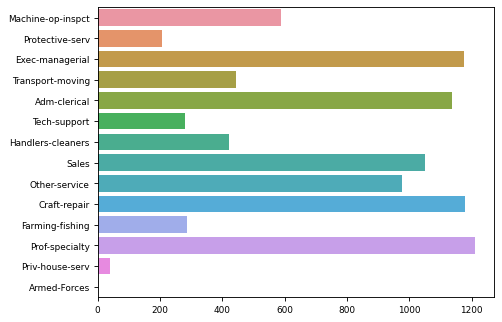

In [ ]:
# How many unique occupations?
o = Counter(occupations)
# occupations

sns.barplot(
    y=list(o.keys()),
    x=list(o.values()),
    orient='h')

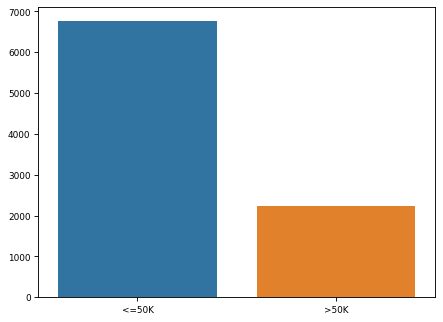

In [ ]:
# distribution of incomes?
i = Counter(incomes)

sns.barplot(
    x=list(i.keys()),
    y=list(i.values()),
    orient='v')

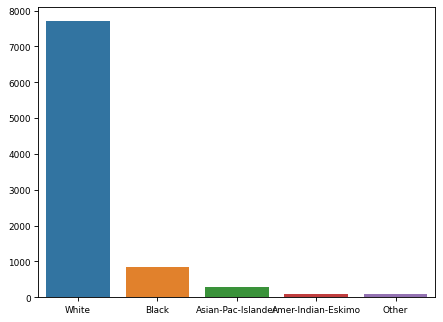

In [ ]:
# Distribution of race?
r = Counter(races)

sns.barplot(
    x=list(r.keys()),
    y=list(r.values()),
    orient='v')

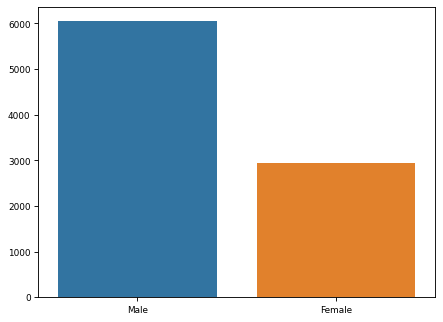

In [ ]:
# distribution of gender?
g = Counter(genders)

sns.barplot(
    x=list(g.keys()),
    y=list(g.values()),
    orient='v')